# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tolanaro
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | anadyr
Processing Record 4 of Set 1 | mahina
Processing Record 5 of Set 1 | puerto lleras
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | kerikeri
Processing Record 11 of Set 1 | iwanai
Processing Record 12 of Set 1 | mejit
Processing Record 13 of Set 1 | saint-pierre
Processing Record 14 of Set 1 | dhromolaxia
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | awjilah
Processing Record 17 of Set 1 | priozersk
Processing Record 18 of Set 1 | weno
Processing Record 19 of Set 1 | gebeit
Processing Record 20 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 2

Processing Record 36 of Set 4 | bikenibeu village
Processing Record 37 of Set 4 | burang
Processing Record 38 of Set 4 | namibe
Processing Record 39 of Set 4 | illizi
Processing Record 40 of Set 4 | twin falls
Processing Record 41 of Set 4 | sosnovo-ozerskoye
Processing Record 42 of Set 4 | chui
Processing Record 43 of Set 4 | st. john's
Processing Record 44 of Set 4 | sydney
Processing Record 45 of Set 4 | hilo
Processing Record 46 of Set 4 | haiku-pauwela
Processing Record 47 of Set 4 | vodnyy
Processing Record 48 of Set 4 | sume
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 0 of Set 5 | revda
Processing Record 1 of Set 5 | ust-nera
Processing Record 2 of Set 5 | upington
Processing Record 3 of Set 5 | keflavik
Processing Record 4 of Set 5 | victorica
Processing Record 5 of Set 5 | kokopo
Processing Record 6 of Set 5 | seogwipo
City not found. Skipping...
Processing Record 7 of Set 5 | hadibu
Processing Record 8 of Set 5 | neiafu
Processing Record 9 of Set 5 | nish

Processing Record 30 of Set 8 | buq'ata
City not found. Skipping...
Processing Record 31 of Set 8 | yeppoon
Processing Record 32 of Set 8 | novoagansk
Processing Record 33 of Set 8 | kirakira
Processing Record 34 of Set 8 | chiili
City not found. Skipping...
Processing Record 35 of Set 8 | labrador city
Processing Record 36 of Set 8 | ust'-ilimsk
Processing Record 37 of Set 8 | leongatha
Processing Record 38 of Set 8 | sao joao dos patos
Processing Record 39 of Set 8 | mascoutah
Processing Record 40 of Set 8 | naliya
Processing Record 41 of Set 8 | antofagasta
Processing Record 42 of Set 8 | haapavesi
Processing Record 43 of Set 8 | laguna
Processing Record 44 of Set 8 | garachico
Processing Record 45 of Set 8 | salekhard
Processing Record 46 of Set 8 | caleta de carquin
Processing Record 47 of Set 8 | igrim
Processing Record 48 of Set 8 | khilok
Processing Record 49 of Set 8 | malango
Processing Record 0 of Set 9 | brazzaville
Processing Record 1 of Set 9 | tetyushi
Processing Record 

Processing Record 17 of Set 12 | acarau
Processing Record 18 of Set 12 | mokhsogollokh
Processing Record 19 of Set 12 | barreirinhas
Processing Record 20 of Set 12 | yerofey pavlovich
Processing Record 21 of Set 12 | nadi
Processing Record 22 of Set 12 | wuxi
Processing Record 23 of Set 12 | nova vicosa
Processing Record 24 of Set 12 | freetown
Processing Record 25 of Set 12 | inekar
City not found. Skipping...
Processing Record 26 of Set 12 | gubkinskiy
Processing Record 27 of Set 12 | thinadhoo
Processing Record 28 of Set 12 | bahia honda
Processing Record 29 of Set 12 | berezovyy
Processing Record 30 of Set 12 | san jose de feliciano
Processing Record 31 of Set 12 | mukalla
Processing Record 32 of Set 12 | yirol
City not found. Skipping...
Processing Record 33 of Set 12 | gonabad
Processing Record 34 of Set 12 | fort bragg
Processing Record 35 of Set 12 | nahiyat al fuhud
Processing Record 36 of Set 12 | molochnoye
Processing Record 37 of Set 12 | farra di soligo
-------------------

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tolanaro,-25.0319,46.9987,22.04,83,20,9.26,MG,1692377863
1,stanley,54.8680,-1.6985,16.55,92,75,5.14,GB,1692377863
2,anadyr,64.7500,177.4833,15.28,77,40,4.92,RU,1692377864
3,mahina,-17.5065,-149.4890,21.53,78,20,2.57,PF,1692377864
4,puerto lleras,3.0223,-73.4044,30.63,64,34,1.23,CO,1692377865


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,22.04,83,20,9.26,MG,1692377863
1,stanley,54.8680,-1.6985,16.55,92,75,5.14,GB,1692377863
2,anadyr,64.7500,177.4833,15.28,77,40,4.92,RU,1692377864
3,mahina,-17.5065,-149.4890,21.53,78,20,2.57,PF,1692377864
4,puerto lleras,3.0223,-73.4044,30.63,64,34,1.23,CO,1692377865


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

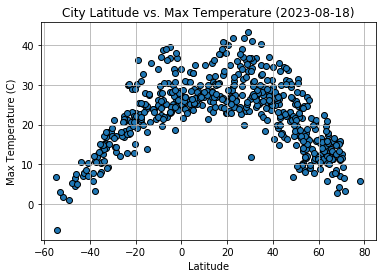

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]

plt.scatter(latitude, temperature, edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

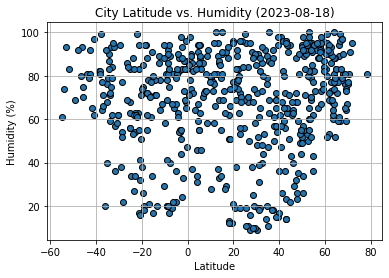

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

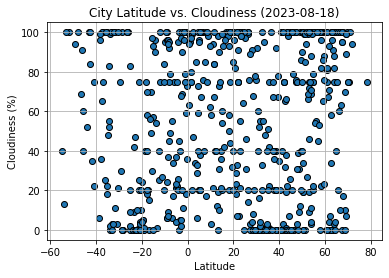

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

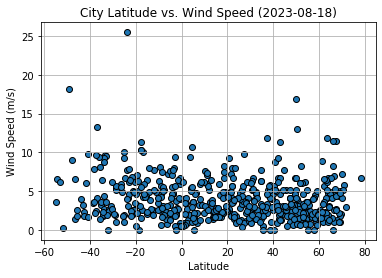

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values,x_label,y_label,c_x,c_y):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq,(c_x,c_y),fontsize=15,color="red")

    print(f"The r-value is: {rvalue**2}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,stanley,54.8680,-1.6985,16.55,92,75,5.14,GB,1692377863
2,anadyr,64.7500,177.4833,15.28,77,40,4.92,RU,1692377864
4,puerto lleras,3.0223,-73.4044,30.63,64,34,1.23,CO,1692377865
8,iwanai,42.9744,140.5089,21.69,96,38,1.92,JP,1692377867
9,mejit,10.2753,170.8646,27.91,79,58,7.54,MH,1692377868


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,22.04,83,20,9.26,MG,1692377863
3,mahina,-17.5065,-149.4890,21.53,78,20,2.57,PF,1692377864
5,edinburgh of the seven seas,-37.0676,-12.3116,12.41,71,100,13.22,SH,1692377865
6,bengkulu,-3.8004,102.2655,24.27,88,45,4.68,ID,1692377866
7,kerikeri,-35.2268,173.9474,10.30,76,100,3.17,NZ,1692377867


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6924967174203225


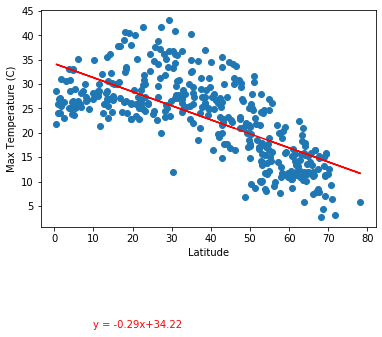

In [15]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_temp = northern_hemi_df["Max Temp"]

nslope, nyint, nr, _, _= linregress(north_lat, north_temp)
north_regression = nslope*(north_lat)+ nyint

print(f"The r-value is: {nr}")

plt.scatter(north_lat, north_temp)
plt.plot(north_lat, north_regression, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.text(10,-20, f"y = {round(nslope,2)}x+{round(nyint,2)}", color='red')

plt.show()

The r-value is: 0.8413427408709643


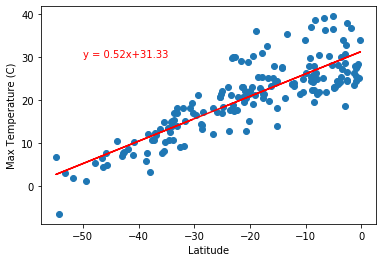

In [16]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_temp = southern_hemi_df["Max Temp"]

sslope, syint, sr, _, _= linregress(south_lat, south_temp)
south_regression = sslope*(south_lat)+ syint

print(f"The r-value is: {sr}")

plt.scatter(south_lat, south_temp)
plt.plot(south_lat, south_regression, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.text(-50,30, f"y = {round(sslope,2)}x+{round(syint,2)}", color='red')

plt.show()

**Discussion about the linear relationship:** Since the r-values are high that is an indicators that there is a strong linear relationship between temperature and latitude based on the hemisphere. The temperature goes down as the latitude goes up in the Northern hemisphere. In the Southern hemisphere it is the opposite, the temperature increases as the latitude goes up. The closer the latitude is to the North and South poles the temperature goes down.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13213729713840863


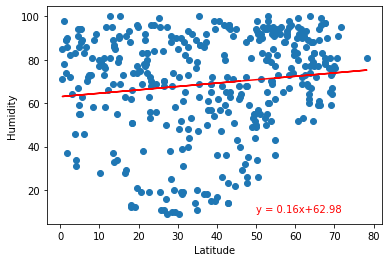

In [17]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_hum = northern_hemi_df["Humidity"]

nslope, nyint, nr, _, _= linregress(north_lat, north_hum)
north_regression = nslope*(north_lat)+ nyint

print(f"The r-value is: {nr}")

plt.scatter(north_lat, north_hum)
plt.plot(north_lat, north_regression, color='red')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(50,10, f"y = {round(nslope,2)}x+{round(nyint,2)}", color='red')

plt.show()

The r-value is: -0.15247914935020476


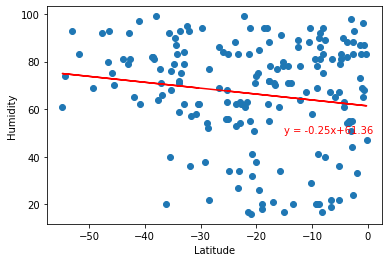

In [18]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_hum = southern_hemi_df["Humidity"]

sslope, syint, sr, _, _= linregress(south_lat, south_hum)
south_regression = sslope*(south_lat)+ syint

print(f"The r-value is: {sr}")

plt.scatter(south_lat, south_hum)
plt.plot(south_lat, south_regression, color='red')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(-15,50, f"y = {round(sslope,2)}x+{round(syint,2)}", color='red')

plt.show()

**Discussion about the linear relationship:** There appears to be a slight correlation present in the data, however there is only a small linear relationship between latitude and humidity. This relationship is not strong as indicated by the low r-values so the correlation is weak.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02122746988333468


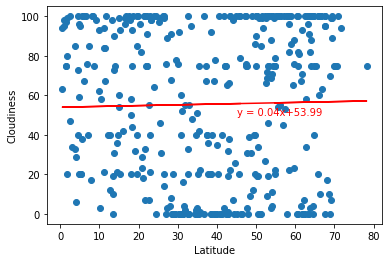

In [19]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_cloud = northern_hemi_df["Cloudiness"]

nslope, nyint, nr, _, _= linregress(north_lat, north_cloud)
north_regression = nslope*(north_lat)+ nyint

print(f"The r-value is: {nr}")

plt.scatter(north_lat, north_cloud)
plt.plot(north_lat, north_regression, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(45,50, f"y = {round(nslope,2)}x+{round(nyint,2)}", color='red')

plt.show()

The r-value is: -0.06207533664688679


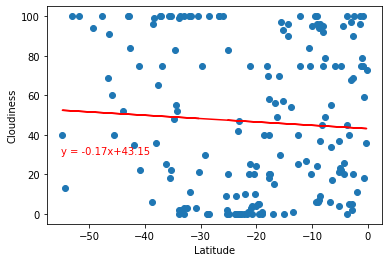

In [20]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_cloud = southern_hemi_df["Cloudiness"]

sslope, syint, sr, _, _= linregress(south_lat, south_cloud)
south_regression = sslope*(south_lat)+ syint

print(f"The r-value is: {sr}")

plt.scatter(south_lat, south_cloud)
plt.plot(south_lat, south_regression, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(-55,30, f"y = {round(sslope,2)}x+{round(syint,2)}", color='red')

plt.show()

**Discussion about the linear relationship:** There is a linear relationship between latitude and cloudiness, this relationship is small. Both of the r-values are small so while the linear regressions do show a linear relationship between latitude and cloudiness. The r-values suggest the relationships are weak.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.009186716741451412


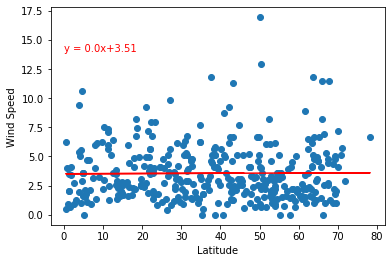

In [21]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_wind = northern_hemi_df["Wind Speed"]

nslope, nyint, nr, _, _= linregress(north_lat, north_wind)
north_regression = nslope*(north_lat)+ nyint

print(f"The r-value is: {nr}")

plt.scatter(north_lat, north_wind)
plt.plot(north_lat, north_regression, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.text(0,14, f"y = {round(nslope,2)}x+{round(nyint,2)}", color='red')

plt.show()

The r-value is: -0.12883944720385368


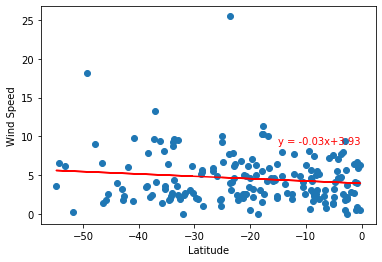

In [22]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_wind = southern_hemi_df["Wind Speed"]

sslope, syint, sr, _, _= linregress(south_lat, south_wind)
south_regression = sslope*(south_lat)+ syint

print(f"The r-value is: {sr}")

plt.scatter(south_lat, south_wind)
plt.plot(south_lat, south_regression, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.text(-15,9, f"y = {round(sslope,2)}x+{round(syint,2)}", color='red')

plt.show()

**Discussion about the linear relationship:** For both hemispheres the r value is very low suggesting a weak or non-existent linear relationship and correlation.